# Working with Instrumental Descriptions

the instrumental description is loaded by the event source, and consists of a hierarchy of classes in the ctapipe.instrument module, the base of which is the `SubarrayDescription`

In [1]:
from ctapipe.utils.datasets import get_dataset_path
from ctapipe.io import EventSource
import numpy as np

filename = get_dataset_path("gamma_prod5.simtel.zst")  

with EventSource(filename, max_events=1) as source:
    subarray = source.subarray

## the SubarrayDescription:

In [2]:
subarray.info()

Subarray : MonteCarloArray
Num Tels : 180
Footprint: 4.92 km2

       Type       Count     Tel IDs    
----------------- ----- ---------------
MST_MST_NectarCam    28 100-124,128-130
 MST_MST_FlashCam    28 5-29,125-127   
   LST_LST_LSTCam     4 1-4            
   SST_ASTRI_CHEC   120 30-99,131-180  


In [3]:
subarray.to_table()

tel_id,pos_x,pos_y,pos_z,name,type,camera_type,camera_index,optics_index,tel_description
,m,m,m,,,,,,
int16,float32,float32,float32,str5,str3,str9,int64,int64,str17
1,-20.643,-64.817,34.3,LST,LST,LSTCam,0,2,LST_LST_LSTCam
2,79.993996,-0.768,29.4,LST,LST,LSTCam,0,2,LST_LST_LSTCam
3,-19.396,65.2,31.0,LST,LST,LSTCam,0,2,LST_LST_LSTCam
4,-120.033,1.151,33.1,LST,LST,LSTCam,0,2,LST_LST_LSTCam
5,-0.017,-0.001,24.35,MST,MST,FlashCam,1,1,MST_MST_FlashCam
6,-1.468,-151.221,31.0,MST,MST,FlashCam,1,1,MST_MST_FlashCam
7,-3.1379998,-325.245,39.0,MST,MST,FlashCam,1,1,MST_MST_FlashCam
8,1.4339999,151.22,25.0,MST,MST,FlashCam,1,1,MST_MST_FlashCam


You can also get a table of just the `OpticsDescriptions` (`CameraGeometry` is more complex and can't be stored on a single table row, so each one can be converted to a table separately)

In [4]:
subarray.to_table(kind='optics')

description,name,type,mirror_area,num_mirrors,num_mirror_tiles,equivalent_focal_length
,,,m2,,,m
str17,str5,str3,float64,int64,int64,float64
MST_MST_NectarCam,MST,MST,106.2413558959961,1,86,16.445049285888672
MST_MST_FlashCam,MST,MST,106.2413558959961,1,86,16.445049285888672
LST_LST_LSTCam,LST,LST,386.7332458496094,1,198,29.30565071105957
SST_ASTRI_CHEC,ASTRI,SST,14.126235008239746,2,2,2.1519100666046143


Make a sub-array with only SC-type telescopes:

In [5]:
sc_tels =[tel_id for tel_id, tel in subarray.tel.items() if tel.optics.num_mirrors ==  2]
newsub = subarray.select_subarray(sc_tels, name="SCTels")
newsub.info()

Subarray : SCTels
Num Tels : 120
Footprint: 4.92 km2

     Type      Count    Tel IDs   
-------------- ----- -------------
SST_ASTRI_CHEC   120 30-99,131-180


can also do this by using `Table.group_by`

## Explore some of the details of the telescopes

In [6]:
tel = subarray.tel[1]
tel

TelescopeDescription(type=LST, name=LST, optics=LST, camera=LSTCam)

In [7]:
tel.optics.mirror_area

<Quantity 386.73324585 m2>

In [8]:
tel.optics.num_mirror_tiles

198

In [9]:
tel.optics.equivalent_focal_length

<Quantity 29.30565071 m>

In [10]:
tel.camera

CameraDescription(camera_name=LSTCam, geometry=LSTCam, readout=LSTCam)

In [11]:
tel.camera.geometry.pix_x

<Quantity [ 0.        , -0.0377967 , -0.04724547, ...,  0.67088033,
           -0.45356484, -0.50081024] m>

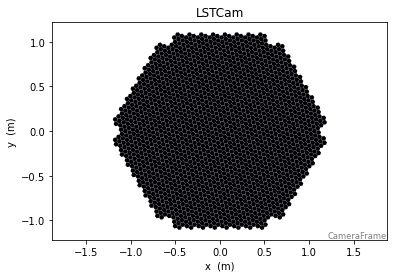

In [12]:
%matplotlib inline
from ctapipe.visualization import CameraDisplay
CameraDisplay(tel.camera.geometry)

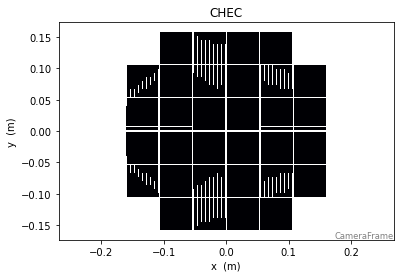

In [13]:
CameraDisplay(subarray.tel[98].camera.geometry)

## Plot the subarray

We'll make a subarray by telescope type and plot each separately, so they appear in different colors.  We also calculate the radius using the mirror area (and exagerate it a bit).

This is just for debugging and info, for any "real" use, a `visualization.ArrayDisplay` should be used

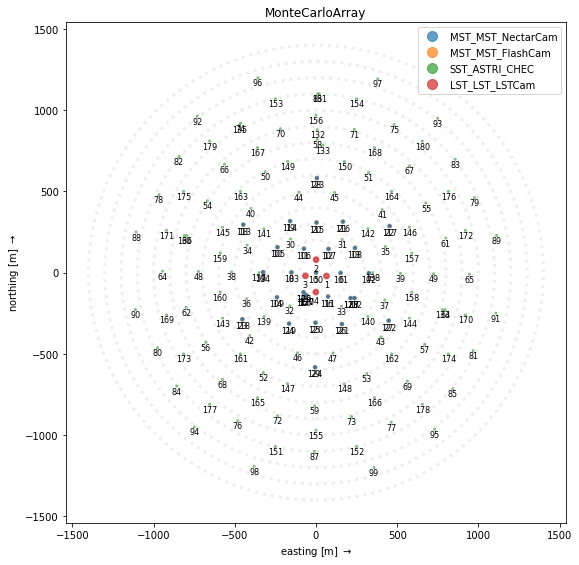

In [14]:
subarray.peek()

In [15]:
subarray.footprint

<Quantity 4.92346317 km2>

## Get info about the subarray in general

In [16]:
subarray.telescope_types

[TelescopeDescription(type=MST, name=MST, optics=MST, camera=NectarCam),
 TelescopeDescription(type=MST, name=MST, optics=MST, camera=FlashCam),
 TelescopeDescription(type=LST, name=LST, optics=LST, camera=LSTCam),
 TelescopeDescription(type=SST, name=ASTRI, optics=ASTRI, camera=CHEC)]

In [17]:
subarray.camera_types

[CameraDescription(camera_name=LSTCam, geometry=LSTCam, readout=LSTCam),
 CameraDescription(camera_name=FlashCam, geometry=FlashCam, readout=FlashCam),
 CameraDescription(camera_name=NectarCam, geometry=NectarCam, readout=NectarCam),
 CameraDescription(camera_name=CHEC, geometry=CHEC, readout=CHEC)]

In [18]:
subarray.optics_types

[OpticsDescription(name=LST, equivalent_focal_length=29.31 m, num_mirrors=1, mirror_area=386.73 m2),
 OpticsDescription(name=ASTRI, equivalent_focal_length=2.15 m, num_mirrors=2, mirror_area=14.13 m2),
 OpticsDescription(name=MST, equivalent_focal_length=16.45 m, num_mirrors=1, mirror_area=106.24 m2)]

In [19]:
from astropy.coordinates import SkyCoord
from ctapipe.coordinates import GroundFrame
center = SkyCoord("10.0 m", "2.0 m", "0.0 m", frame='groundframe')
coords = subarray.tel_coords  # a flat list of coordinates by tel_index
coords.separation(center)

<Angle [115.63014925,  23.28019825,  94.78251809, 160.63833105,
         90.03968582, 101.62099853, 101.77713186,  78.30773406,
         78.17454627,  45.45999318,  16.99024097,  39.97681403,
         69.10011445, 110.92884517, 139.89780763, 161.89929049,
        134.2346161 ,  45.32551882,  15.68600633,  12.39167346,
         39.26720394,  69.03997654, 111.01749555, 140.58856049,
        166.95920229, 163.5926509 , 134.48337671,  11.93286185,
        167.6312177 ,  26.03184384,  49.71482147, 130.25249696,
        153.46499701,  56.96848545,  80.68305003,  99.34352352,
        122.90613377,  78.14518161, 101.82393586,  34.03013531,
         57.77812763, 122.25987001, 145.65400609,   1.24847673,
         24.4351971 , 155.4045918 , 176.51634911,  78.14317624,
        101.82029017,  15.42110816,  39.11960335, 140.84366604,
        164.08053533,  45.2944    ,  69.0116324 , 111.02764679,
        134.53170892,  11.86334528, 167.95021132,  62.66858341,
         86.38258597,  93.62776638, 117.

## Telescope IDs vs Indices

Note that `subarray.tel` is a dict mapped by `tel_id` (the indentifying number of a telescope).  It is  possible to have telescope IDs that do not start at 0, are not contiguouous (e.g. if a subarray is selected).  Some functions and properties like `tel_coords` are numpy arrays (not dicts) so they are not mapped to the telescope ID, but rather the *index* within this SubarrayDescription. To convert between the two concepts you can do:

In [20]:
subarray.tel_ids_to_indices([1,5,23])

array([ 0,  4, 22])

or you can get the indexing array directly in numpy or dict form:

In [21]:
subarray.tel_index_array

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [22]:
subarray.tel_index_array[[1,5,23]]

array([ 0,  4, 22])

In [23]:
subarray.tel_indices[1]  # this is a dict of tel_id -> tel_index, so we can only do one at once

0

In [24]:
ids = subarray.get_tel_ids_for_type(subarray.telescope_types[0])
ids

[100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 128,
 129,
 130]

In [25]:
idx = subarray.tel_ids_to_indices(ids)
idx

array([ 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 127,
       128, 129])

In [26]:
subarray.tel_coords[idx]

<SkyCoord (GroundFrame): (x, y, z) in m
    [(-1.70000009e-02, -1.0000000e-03, 24.35),
     (-1.46800005e+00, -1.5122099e+02, 31.  ),
     (-3.13799977e+00, -3.2524500e+02, 39.  ),
     ( 1.43399990e+00,  1.5122000e+02, 25.  ),
     ( 3.10399985e+00,  3.2524301e+02, 23.5 ),
     ( 1.56492996e+02,  2.3705199e+02, 24.  ),
     ( 1.47427994e+02,  7.4202003e+01, 21.  ),
     ( 1.45977005e+02, -7.7018997e+01, 26.  ),
     ( 1.51914993e+02, -2.4001300e+02, 30.  ),
     (-1.51949005e+02,  2.4001100e+02, 27.  ),
     (-1.46011002e+02,  7.7016998e+01, 28.  ),
     (-1.47462006e+02, -7.4202995e+01, 28.  ),
     (-1.56527008e+02, -2.3705301e+02, 38.5 ),
     ( 2.95343018e+02,  4.4746698e+02, 25.  ),
     ( 3.17085999e+02,  1.5959300e+02, 18.5 ),
     ( 3.08424988e+02, -2.9600000e+00, 19.5 ),
     ( 3.13964996e+02, -1.6564999e+02, 22.5 ),
     ( 2.86701996e+02, -4.5305399e+02, 38.5 ),
     (-2.86834991e+02,  4.5305399e+02, 17.  ),
     (-3.13598999e+02,  1.6564600e+02, 30.5 ),
     (-3.08459015e+0

so, with that method you can quickly get many telescope positions at once (the alternative is to use the dict `positions` which maps `tel_id` to a position on the ground

In [27]:
subarray.positions[1]

<Quantity [-20.643, -64.817,  34.3  ] m>